# Part 1 - Naiive Bayes Models

## Loadind dataset

In [107]:

import pandas as pd

df = pd.read_csv("F:\Conestoga\AI and Algo\Fall2023--AI-Algo\practical_labs\datasets\Lab_2\Lab2_dataset.csv")
df


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


## vectorizer to convert text data to vector

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, 
                             stop_words='english',  
                             lowercase=True)
vectorizer

CountVectorizer(max_features=1000, stop_words='english')

In [123]:
X = df["text"]
y = df['label'] 

## split dataset in train and test to tain and evaluate the model

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

5132    Subject: april activity surveys\r\nwe are star...
2067    Subject: message subject\r\nhey i ' am julie ^...
4716    Subject: txu fuels / sds nomination for may 20...
4710    Subject: re : richardson volumes nov 99 and de...
2268    Subject: a new era of online medical care .\r\...
                              ...                        
4426    Subject: re : ena sales on hpl\r\nlast that i ...
466     Subject: tenaska iv\r\nbob :\r\ni understand f...
3092    Subject: broom , bristles up , flew\r\nbe diff...
3772    Subject: calpine daily gas nomination ( weeken...
860     Subject: re : meter 1459 , 6 / 00\r\nyep , you...
Name: text, Length: 4136, dtype: object

In [125]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Gaussian Naive bayes model training and accuracy

In [148]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_vectorized.toarray(), y_train)
y_pred = nb_classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.95      0.95       742
        spam       0.88      0.89      0.89       293

    accuracy                           0.94      1035
   macro avg       0.92      0.92      0.92      1035
weighted avg       0.94      0.94      0.94      1035



## Multinominal Naive bayes model training and accuracy

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

y_pred = nb_classifier.predict(X_test_vectorized)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.95      0.95       742
        spam       0.88      0.89      0.89       293

    accuracy                           0.94      1035
   macro avg       0.92      0.92      0.92      1035
weighted avg       0.94      0.94      0.94      1035



In [113]:
vectorizer_binary = CountVectorizer(max_features=1000, stop_words='english', lowercase=True, binary=True)
X_train_binarized = vectorizer_binary.fit_transform(X_train)
X_test_binarized = vectorizer_binary.transform(X_test)

## Bernoulli Naive bayes model training and accuracy

In [151]:
from sklearn.naive_bayes import BernoulliNB
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train_binarized, y_train)
y_pred = bnb_classifier.predict(X_test_binarized)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      0.93      0.96       742
        spam       0.84      0.99      0.91       293

    accuracy                           0.94      1035
   macro avg       0.92      0.96      0.94      1035
weighted avg       0.95      0.94      0.95      1035



### It can be seen that the accuracy of all the models are identical. However, Bernoulli Naive bayes model performed slightly better compared to Gaussian and Multinominal. The reason being it used binary values of feature column compared to vectorised values. Hence, the most affecting factor in evaluating performance of model is the data type being used to train them. The other factors related to data (the data balance, feature engineering, etc) have minimal involvement in this case as the features are the same everytime we train any model, it just has different data-type. 

# Part 2 - Data Cleaning and Data Prepo

In [129]:
df_b = pd.read_csv("F:\Conestoga\AI and Algo\Fall2023--AI-Algo\practical_labs\datasets\Lab_2\AB_NYC_2019.csv")
df_b

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


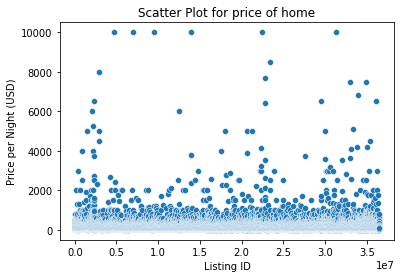

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.scatterplot(x='id', y='price', data=df_b)
plt.xlabel('Listing ID')
plt.ylabel('Price per Night (USD)')
plt.title('Scatter Plot for price of home')
plt.show()

### The scatter plot above shows that price column in data certainly has outliers. Visually, it can be seen that most of the data ies in the range of - to 1500. Let's describe the dataframe, which would give us more details about how many column do we have, the mean and median values of the columns and most importantly the quantiles of differenct columns, which would be used to remove outliers efficiently. 

In [152]:
df_b.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### To remove outliers, interquantiale range method can be used. we can define interquantile range (q) by substracting first quantile from third quantile. We can find lower and upper bound values of the price column and can apply everything to the dataframe to generate a new dataframe with removed outliers. 

In [135]:
q1_price = df_b["price"].quantile(0.25)
q3_price = df_b["price"].quantile(0.75)
q = q3_price- q1_price
multiplier = 1.5
lower_bound = q1_price - multiplier * q
upper_bound = q3_price + multiplier * q

In [137]:
df_filtered = df_b[(df_b["price"] >= lower_bound) & (df_b["price"] <= upper_bound)]
df_filtered

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [138]:
df_filtered.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.592300e+04,4.592300e+04,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,36911.000000,45923.000000,45923.000000
mean,1.889853e+07,6.632693e+07,40.728488,-73.950733,119.970320,6.938070,23.942665,1.378199,6.639701,109.378699
std,1.091922e+07,7.755778e+07,0.055331,0.046471,68.150148,19.857823,45.315219,1.692006,31.008148,130.279393
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.436180e+06,7.724081e+06,40.689235,-73.981925,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952568e+07,3.028359e+07,40.721770,-73.954370,100.000000,2.000000,5.000000,0.710000,1.000000,39.000000
75%,2.891256e+07,1.055068e+08,40.763390,-73.934315,159.000000,5.000000,24.000000,2.020000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


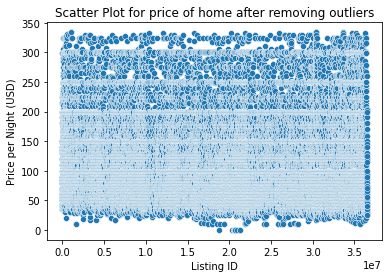

In [153]:
sns.scatterplot(x='id', y='price', data=df_filtered)
plt.xlabel('Listing ID')
plt.ylabel('Price per Night (USD)')
plt.title('Scatter Plot for price of home after removing outliers')
plt.show()

In [145]:
df_b.shape

(48895, 16)

In [146]:
df_filtered.shape

(45923, 16)

In [147]:
df_b.shape[0] - df_filtered.shape[0]

2972

### The new scatter plot clearly shows the data of column price is now evenly distributated after removing outliers. The shape of the initial and filtered dataset clearly suggests that 2972 rows were deleted in the process of removing outliers. 